In [1]:
import scanpy as sc
import celltypist
import time
import numpy as np

In [2]:
adata_SYSU = sc.read("adata_SYSU.h5ad")

In [3]:
adata_SYSU

AnnData object with n_obs × n_vars = 100915 × 54069
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'patient', 'lesions', 'location', 'neoadjuvant', 'RNA_snn_res.0.2', 'seurat_clusters', 'percent.mt', 'Cluster', 'RNA_snn_res.1', 'RNA_snn_res.3', 'RNA_snn_res.0.3', 'RNA_snn_res.0.1', 'RNA_snn_res.0.25', 'RNA_snn_res.0.6', 'RNA_snn_res.0.4', 'RNA_snn_res.0.7', 'cluster_name', 'RNA_snn_res.0.5', 'is_outlier', 'RNA_snn_res.0.02', 'RNA_snn_res.0.05', 'RNA_snn_res.0.04', 'RNA_snn_res.0.03', 'RNA_snn_res.0.06', 'RNA_snn_res.2', 'sampleID', 'batchID', 'clTopLevel', 'clMidwayPr', 'cl295v11SubShort', 'cl295v11SubFull', 'SPECIMEN_TYPE', 'SOURCE_HOSPITAL', 'TISSUE_PROCESSING_TEAM', 'PROCESSING_TYPE', 'SINGLECELL_TYPE', 'PatientTypeID', 'HistologicTypeSimple', 'MMR_IHC', 'MMRStatus', 'MLH1Status', 'MMRMLH1Tumor', 'TissueSite_detailed', 'TissueSiteSimple', 'HistologicGrade_detailed', 'HistologicGradeSimple', 'TumorStage', 'NodeStatus_detailed', 'NodeStatusSimple', 'MetastasisStatus', 'TumorSize

In [4]:
adata_regev=sc.read("adata_regev.h5ad")

In [5]:
adata_regev

AnnData object with n_obs × n_vars = 59496 × 54069
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'patient', 'lesions', 'location', 'neoadjuvant', 'RNA_snn_res.0.2', 'seurat_clusters', 'percent.mt', 'Cluster', 'RNA_snn_res.1', 'RNA_snn_res.3', 'RNA_snn_res.0.3', 'RNA_snn_res.0.1', 'RNA_snn_res.0.25', 'RNA_snn_res.0.6', 'RNA_snn_res.0.4', 'RNA_snn_res.0.7', 'cluster_name', 'RNA_snn_res.0.5', 'is_outlier', 'RNA_snn_res.0.02', 'RNA_snn_res.0.05', 'RNA_snn_res.0.04', 'RNA_snn_res.0.03', 'RNA_snn_res.0.06', 'RNA_snn_res.2', 'sampleID', 'batchID', 'clTopLevel', 'clMidwayPr', 'cl295v11SubShort', 'cl295v11SubFull', 'SPECIMEN_TYPE', 'SOURCE_HOSPITAL', 'TISSUE_PROCESSING_TEAM', 'PROCESSING_TYPE', 'SINGLECELL_TYPE', 'PatientTypeID', 'HistologicTypeSimple', 'MMR_IHC', 'MMRStatus', 'MLH1Status', 'MMRMLH1Tumor', 'TissueSite_detailed', 'TissueSiteSimple', 'HistologicGrade_detailed', 'HistologicGradeSimple', 'TumorStage', 'NodeStatus_detailed', 'NodeStatusSimple', 'MetastasisStatus', 'TumorSize'

In [6]:
adata_SYSU.obs.cluster_name.unique()

array(['Mono_c5_ANGPTL4', 'Mono_c2_FCN1', 'DC_c8_LAMP3',
       'cDC2_c4_CLEC10A', 'Macro_c3_CD163L1', 'pDC_c9_LILRA4',
       'Cycling_Myeloid_c6', 'Macro_c1_CCL18', 'Macro_c11_HSPH1',
       'Macro_c7_CXCL10', 'Macro_c10_MT1G', 'cDC1_c13_CLEC9A',
       'Macro_c12_CD5L', 'CD4_IL7R_Tn-like2', 'CD8_GZMK_Tem',
       'CD4_CCR7_Tn-like1', 'TYROBP_NK&NKT', 'CD4_FOXP3_Treg',
       'CD8_CXCL13_Tex', 'CD4_IL17A_Th17', 'CD8_SLC4A10_MAIT',
       'Cycling_T', 'Plasma_c1_IGHA2', 'B_c2_CXCR4', 'Neutrophil',
       'Mast_cell', 'mCAF_RGS5', 'endo_PLVAP', 'iCAF_CXCL14'],
      dtype=object)

In [7]:
adata_SYSU.shape

(100915, 54069)

In [8]:
# Sample 500 cells from each cell type for `adata_Elmentaite`.
# All cells from a given cell type will be selected if the cell type size is < 500.
sampled_cell_index = celltypist.samples.downsample_adata(adata_SYSU, mode = 'each', n_cells = 500, by = 'cluster_name', return_index = True)

In [9]:
print(f"Number of downsampled cells for training: {len(sampled_cell_index)}")

Number of downsampled cells for training: 11587


In [10]:
# Use `celltypist.train` to quickly train a rough CellTypist model.
# You can also set `mini_batch = True` to enable mini-batch training.
t_start = time.time()
model_fs = celltypist.train(adata_SYSU[sampled_cell_index], 'cluster_name', n_jobs = 10, max_iter = 5, use_SGD = True)
t_end = time.time()
print(f"Time elapsed: {t_end - t_start} seconds")

🍳 Preparing data before training
✂️ 30170 non-expressed genes are filtered out
🔬 Input data has 11587 cells and 23899 genes
⚖️ Scaling input data
🏋️ Training data using SGD logistic regression
✅ Model training done!


Time elapsed: 17.991683959960938 seconds


In [11]:
gene_index = np.argpartition(np.abs(model_fs.classifier.coef_), -100, axis = 1)[:, -100:]

In [12]:
gene_index = np.unique(gene_index)

In [13]:
print(f"Number of genes selected: {len(gene_index)}")

Number of genes selected: 2482


In [15]:
# Add `check_expression = False` to bypass expression check with only a subset of genes.
t_start = time.time()
model = celltypist.train(adata_SYSU[sampled_cell_index, gene_index], 'cluster_name', check_expression = False, n_jobs = 10, max_iter = 100)
t_end = time.time()
print(f"Time elapsed: {(t_end - t_start)/60} minutes")

🍳 Preparing data before training
✂️ 146 non-expressed genes are filtered out
🔬 Input data has 11587 cells and 2336 genes
⚖️ Scaling input data
🏋️ Training data using logistic regression
/opt/homebrew/Caskroom/mambaforge/base/envs/scvi_rna/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/Caskroom/mambaforge/base/envs/scvi_rna/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (ma

Time elapsed: 0.24175026814142864 minutes


In [16]:
# Save the model.
model.write('model_from_adata_SYSU.pkl')

In [18]:
# CellTypist prediction without over-clustering and majority-voting.
t_start = time.time()
predictions = celltypist.annotate(adata_regev, model = 'model_from_adata_SYSU.pkl', majority_voting = True)
t_end = time.time()
print(f"Time elapsed: {t_end - t_start} seconds")

🔬 Input data has 59496 cells and 54069 genes
🔗 Matching reference genes in the model
🧬 2336 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
⛓️ Over-clustering input data with resolution set to 20
🗳️ Majority voting the predictions
✅ Majority voting done!


Time elapsed: 112.94642686843872 seconds


In [19]:
predictions.predicted_labels

,predicted_labels,over_clustering,majority_voting
C103_T_1_1_0_c1_v2_id-AAACCTGTCGGATGTT,CD4_IL7R_Tn-like2,147,CD4_IL17A_Th17
C103_T_1_1_0_c1_v2_id-AAACGGGCAACCGCCA,CD8_SLC4A10_MAIT,219,CD4_IL7R_Tn-like2
C103_T_1_1_0_c1_v2_id-AAAGATGCACGGACAA,Macro_c10_MT1G,136,Macro_c7_CXCL10
C103_T_1_1_0_c1_v2_id-AAAGCAAAGGTAGCCA,Macro_c10_MT1G,95,Macro_c10_MT1G
C103_T_1_1_0_c1_v2_id-AAAGTAGAGGACACCA,Cycling_T,67,CD4_IL7R_Tn-like2
...,...,...,...
C172_T_0_0_0_c1_v3_id-TTTCCTCTCATTGTGG,Macro_c12_CD5L,140,Macro_c1_CCL18
C172_T_0_0_0_c1_v3_id-TTTGACTCATGAGGGT,CD4_IL7R_Tn-like2,135,CD4_FOXP3_Treg
C172_T_0_0_0_c1_v3_id-TTTGACTTCTCGCGTT,CD8_CXCL13_Tex,73,TYROBP_NK&NKT
C172_T_0_0_0_c1_v3_id-TTTGGTTCAGCTTCCT,CD8_CXCL13_Tex,260,CD8_CXCL13_Tex


In [23]:
# Get an `AnnData` with predicted labels embedded into the cell metadata columns.
adata = predictions.to_adata()

In [24]:
adata.obs.iloc[:, -4:]

,predicted_labels,over_clustering,majority_voting,conf_score
C103_T_1_1_0_c1_v2_id-AAACCTGTCGGATGTT,CD4_IL7R_Tn-like2,147,CD4_IL17A_Th17,0.606488
C103_T_1_1_0_c1_v2_id-AAACGGGCAACCGCCA,CD8_SLC4A10_MAIT,219,CD4_IL7R_Tn-like2,0.103708
C103_T_1_1_0_c1_v2_id-AAAGATGCACGGACAA,Macro_c10_MT1G,136,Macro_c7_CXCL10,0.055299
C103_T_1_1_0_c1_v2_id-AAAGCAAAGGTAGCCA,Macro_c10_MT1G,95,Macro_c10_MT1G,0.025328
C103_T_1_1_0_c1_v2_id-AAAGTAGAGGACACCA,Cycling_T,67,CD4_IL7R_Tn-like2,0.026587
...,...,...,...,...
C172_T_0_0_0_c1_v3_id-TTTCCTCTCATTGTGG,Macro_c12_CD5L,140,Macro_c1_CCL18,0.024682
C172_T_0_0_0_c1_v3_id-TTTGACTCATGAGGGT,CD4_IL7R_Tn-like2,135,CD4_FOXP3_Treg,0.007388
C172_T_0_0_0_c1_v3_id-TTTGACTTCTCGCGTT,CD8_CXCL13_Tex,73,TYROBP_NK&NKT,0.946876
C172_T_0_0_0_c1_v3_id-TTTGGTTCAGCTTCCT,CD8_CXCL13_Tex,260,CD8_CXCL13_Tex,0.003471


In [37]:
adata.obs.iloc[:, -4:]['majority_voting'].unique()

['CD4_IL17A_Th17', 'CD4_IL7R_Tn-like2', 'Macro_c7_CXCL10', 'Macro_c10_MT1G', 'DC_c8_LAMP3', ..., 'Mono_c5_ANGPTL4', 'CD8_SLC4A10_MAIT', 'pDC_c9_LILRA4', 'Macro_c11_HSPH1', 'Macro_c3_CD163L1']
Length: 24
Categories (27, object): ['B_c2_CXCR4', 'CD4_CCR7_Tn-like1', 'CD4_FOXP3_Treg', 'CD4_IL17A_Th17', ..., 'cDC1_c13_CLEC9A', 'cDC2_c4_CLEC10A', 'iCAF_CXCL14', 'pDC_c9_LILRA4']

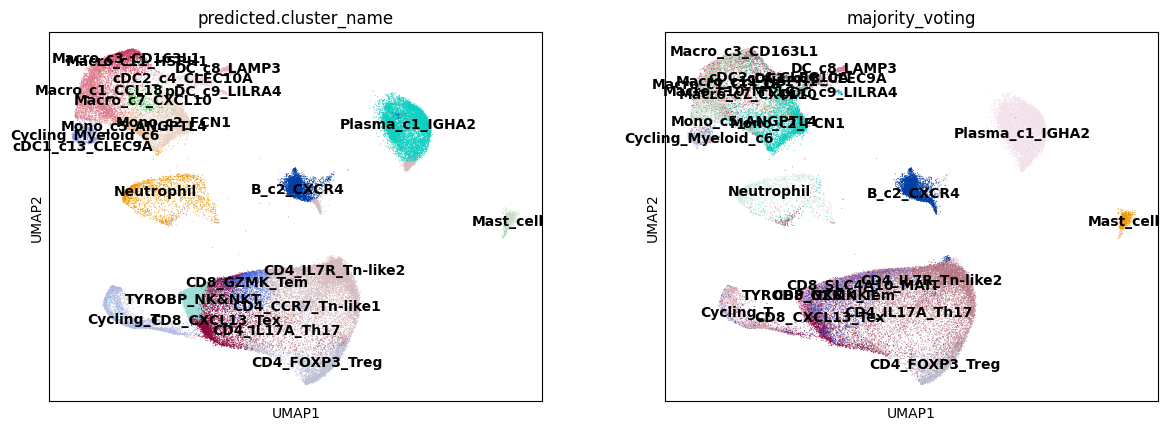

In [30]:
sc.pl.umap(adata, color = ['predicted.cluster_name', 'majority_voting'], legend_loc = 'on data')

In [32]:
adata

AnnData object with n_obs × n_vars = 59496 × 54069
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'patient', 'lesions', 'location', 'neoadjuvant', 'RNA_snn_res.0.2', 'seurat_clusters', 'percent.mt', 'Cluster', 'RNA_snn_res.1', 'RNA_snn_res.3', 'RNA_snn_res.0.3', 'RNA_snn_res.0.1', 'RNA_snn_res.0.25', 'RNA_snn_res.0.6', 'RNA_snn_res.0.4', 'RNA_snn_res.0.7', 'cluster_name', 'RNA_snn_res.0.5', 'is_outlier', 'RNA_snn_res.0.02', 'RNA_snn_res.0.05', 'RNA_snn_res.0.04', 'RNA_snn_res.0.03', 'RNA_snn_res.0.06', 'RNA_snn_res.2', 'sampleID', 'batchID', 'clTopLevel', 'clMidwayPr', 'cl295v11SubShort', 'cl295v11SubFull', 'SPECIMEN_TYPE', 'SOURCE_HOSPITAL', 'TISSUE_PROCESSING_TEAM', 'PROCESSING_TYPE', 'SINGLECELL_TYPE', 'PatientTypeID', 'HistologicTypeSimple', 'MMR_IHC', 'MMRStatus', 'MLH1Status', 'MMRMLH1Tumor', 'TissueSite_detailed', 'TissueSiteSimple', 'HistologicGrade_detailed', 'HistologicGradeSimple', 'TumorStage', 'NodeStatus_detailed', 'NodeStatusSimple', 'MetastasisStatus', 'TumorSize'

In [33]:
adata.obs.iloc[:, -4:].to_csv('regev_celltypist.csv', index=True)


In [ ]:
#####scANVI######

In [40]:
import os
import tempfile

import anndata
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import scvi
import torch
from scvi.model.utils import mde

In [51]:
adata_regev.raw[:5,:5]

In [81]:
adata_regev.layers["counts"] = adata_regev.raw.X.copy()

In [83]:
adata_SYSU.layers["counts"] = adata_SYSU.raw.X.copy()

In [84]:
sc.pp.highly_variable_genes(
    adata_SYSU, n_top_genes=2000, batch_key="From", subset=True
)

adata_regev = adata_regev[:, adata_SYSU.var_names].copy()

... storing 'orig.ident' as categorical
... storing 'patient' as categorical
... storing 'lesions' as categorical
... storing 'location' as categorical
... storing 'neoadjuvant' as categorical
... storing 'RNA_snn_res.0.2' as categorical
... storing 'seurat_clusters' as categorical
... storing 'Cluster' as categorical
... storing 'RNA_snn_res.1' as categorical
... storing 'RNA_snn_res.3' as categorical
... storing 'RNA_snn_res.0.3' as categorical
... storing 'RNA_snn_res.0.1' as categorical
... storing 'RNA_snn_res.0.25' as categorical
... storing 'RNA_snn_res.0.6' as categorical
... storing 'RNA_snn_res.0.4' as categorical
... storing 'RNA_snn_res.0.7' as categorical
... storing 'cluster_name' as categorical
... storing 'RNA_snn_res.0.5' as categorical
... storing 'RNA_snn_res.0.02' as categorical
... storing 'RNA_snn_res.0.05' as categorical
... storing 'RNA_snn_res.0.04' as categorical
... storing 'RNA_snn_res.0.03' as categorical
... storing 'RNA_snn_res.0.06' as categorical
... st

In [85]:
scvi.model.SCVI.setup_anndata(adata_SYSU, batch_key="From", layer="counts")


Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
Unable to initialize backend 'tpu': module 'jaxlib.xla_extension' has no attribute 'get_tpu_client'


In [86]:
scvi_ref = scvi.model.SCVI(
    adata_SYSU,
    use_layer_norm="both",
    use_batch_norm="none",
    encode_covariates=True,
    dropout_rate=0.2,
    n_layers=2,
)
scvi_ref.train()

INFO: GPU available: False, used: False
GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
HPU available: False, using: 0 HPUs


Epoch 79/79: 100%|█| 79/79 [35:51<00:00, 26.71s/it, v_num=1, train_loss_step=124

INFO: `Trainer.fit` stopped: `max_epochs=79` reached.
`Trainer.fit` stopped: `max_epochs=79` reached.


Epoch 79/79: 100%|█| 79/79 [35:51<00:00, 27.24s/it, v_num=1, train_loss_step=124


In [87]:
SCVI_LATENT_KEY = "X_scVI"

adata_SYSU.obsm[SCVI_LATENT_KEY] = scvi_ref.get_latent_representation()
sc.pp.neighbors(adata_SYSU, use_rep=SCVI_LATENT_KEY)
sc.tl.leiden(adata_SYSU)
sc.tl.umap(adata_SYSU)

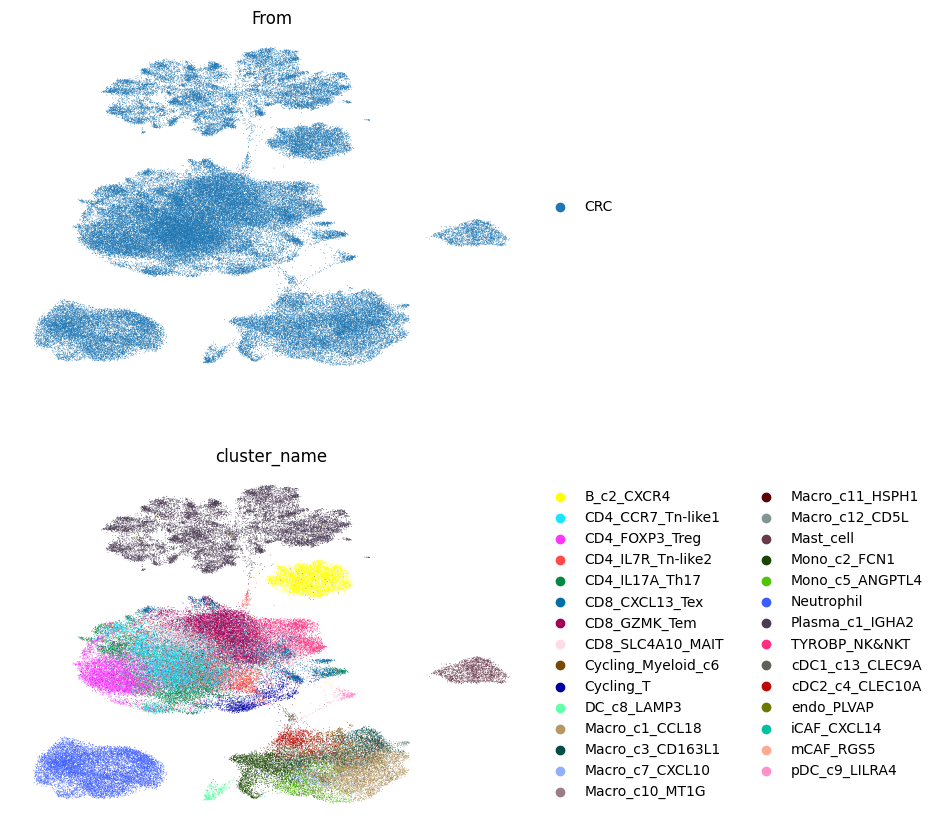

In [88]:
sc.pl.umap(
    adata_SYSU,
    color=["From", "cluster_name"],
    frameon=False,
    ncols=1,
)

In [89]:
scvi_ref_path = os.path.join("/Users/xinliu/Desktop/CRLM/CR revision/CellTypist", "scvi_ref")
scvi_ref.save(scvi_ref_path, overwrite=True)

In [90]:
scvi.model.SCVI.prepare_query_anndata(adata_regev, scvi_ref)

INFO     Found 100.0% reference vars in query data.                                                                


In [91]:
scvi_query = scvi.model.SCVI.load_query_data(
    adata_regev,
    scvi_ref,
)

In [92]:
scvi_query.train(max_epochs=200, plan_kwargs={"weight_decay": 0.0})
adata_regev.obsm[SCVI_LATENT_KEY] = scvi_query.get_latent_representation()

INFO: GPU available: False, used: False
GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
HPU available: False, using: 0 HPUs


Epoch 200/200: 100%|█| 200/200 [41:57<00:00, 12.47s/it, v_num=1, train_loss_step

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|█| 200/200 [41:57<00:00, 12.59s/it, v_num=1, train_loss_step


In [93]:
sc.pp.neighbors(adata_regev, use_rep=SCVI_LATENT_KEY)
sc.tl.leiden(adata_regev)
sc.tl.umap(adata_regev)

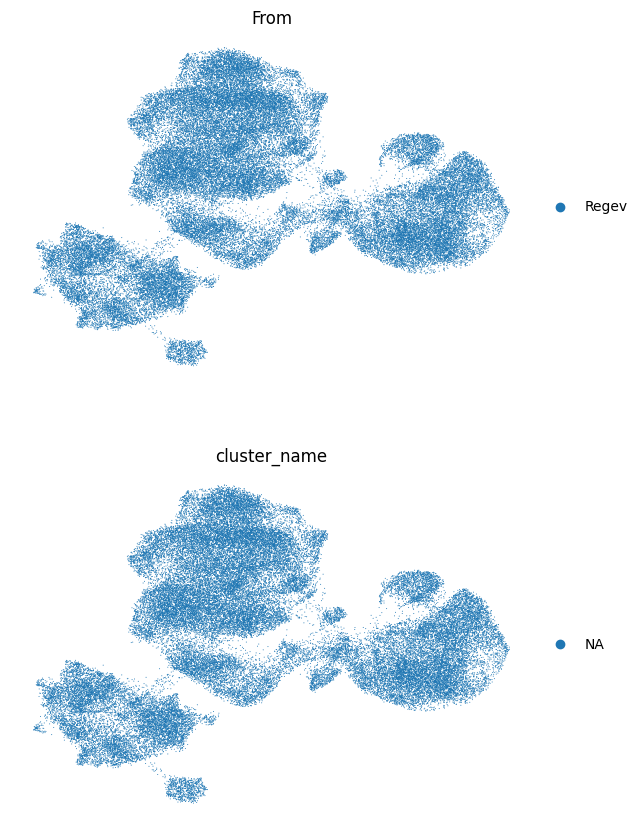

In [94]:
sc.pl.umap(
    adata_regev,
    color=["From", "cluster_name"],
    frameon=False,
    ncols=1,
)

In [95]:
SCANVI_LABELS_KEY = "labels_scanvi"

adata_SYSU.obs[SCANVI_LABELS_KEY] = adata_SYSU.obs["cluster_name"].values

In [96]:
# unlabeled category does not exist in adata.obs[labels_key]
# so all cells are treated as labeled
scanvi_ref = scvi.model.SCANVI.from_scvi_model(
    scvi_ref,
    unlabeled_category="Unknown",
    labels_key=SCANVI_LABELS_KEY,
)

In [100]:
scanvi_ref.train(max_epochs=20, n_samples_per_label=100)

INFO     Training for 20 epochs.                                                                                   


INFO: GPU available: False, used: False
GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
HPU available: False, using: 0 HPUs


Epoch 20/20: 100%|█| 20/20 [22:11<00:00, 66.17s/it, v_num=1, train_loss_step=248

INFO: `Trainer.fit` stopped: `max_epochs=20` reached.
`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 20/20: 100%|█| 20/20 [22:11<00:00, 66.57s/it, v_num=1, train_loss_step=248


In [101]:
SCANVI_LATENT_KEY = "X_scANVI"

adata_SYSU.obsm[SCANVI_LATENT_KEY] = scanvi_ref.get_latent_representation()
sc.pp.neighbors(adata_SYSU, use_rep=SCANVI_LATENT_KEY)
sc.tl.leiden(adata_SYSU)
sc.tl.umap(adata_SYSU)

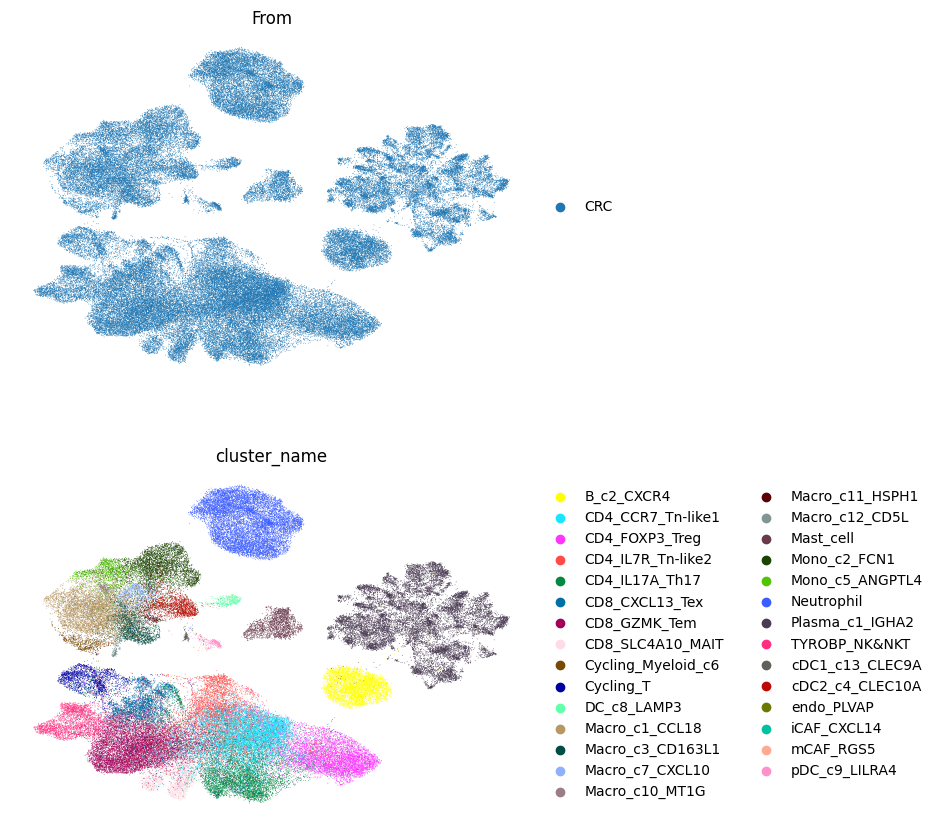

In [102]:
sc.pl.umap(
    adata_SYSU,
    color=["From", "cluster_name"],
    frameon=False,
    ncols=1,
)

In [103]:
scanvi_ref_path = os.path.join("/Users/xinliu/Desktop/CRLM/CR revision/CellTypist", "scanvi_ref")
scanvi_ref.save(scanvi_ref_path, overwrite=True)

In [104]:
# again a no-op in this tutorial, but good practice to use
scvi.model.SCANVI.prepare_query_anndata(adata_regev, scanvi_ref)

INFO     Found 100.0% reference vars in query data.                                                                


In [105]:
scanvi_query = scvi.model.SCANVI.load_query_data(adata_regev, scanvi_ref)

In [106]:
scanvi_query.train(
    max_epochs=100,
    plan_kwargs={"weight_decay": 0.0},
    check_val_every_n_epoch=10,
)

INFO     Training for 100 epochs.                                                                                  


INFO: GPU available: False, used: False
GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
HPU available: False, using: 0 HPUs


Epoch 100/100: 100%|█| 100/100 [48:10<00:00, 28.02s/it, v_num=1, train_loss_step

INFO: `Trainer.fit` stopped: `max_epochs=100` reached.
`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 100/100: 100%|█| 100/100 [48:10<00:00, 28.90s/it, v_num=1, train_loss_step


In [107]:
SCANVI_PREDICTIONS_KEY = "predictions_scanvi"

adata_regev.obsm[SCANVI_LATENT_KEY] = scanvi_query.get_latent_representation()
adata_regev.obs[SCANVI_PREDICTIONS_KEY] = scanvi_query.predict()

Text(0, 0.5, 'Observed')

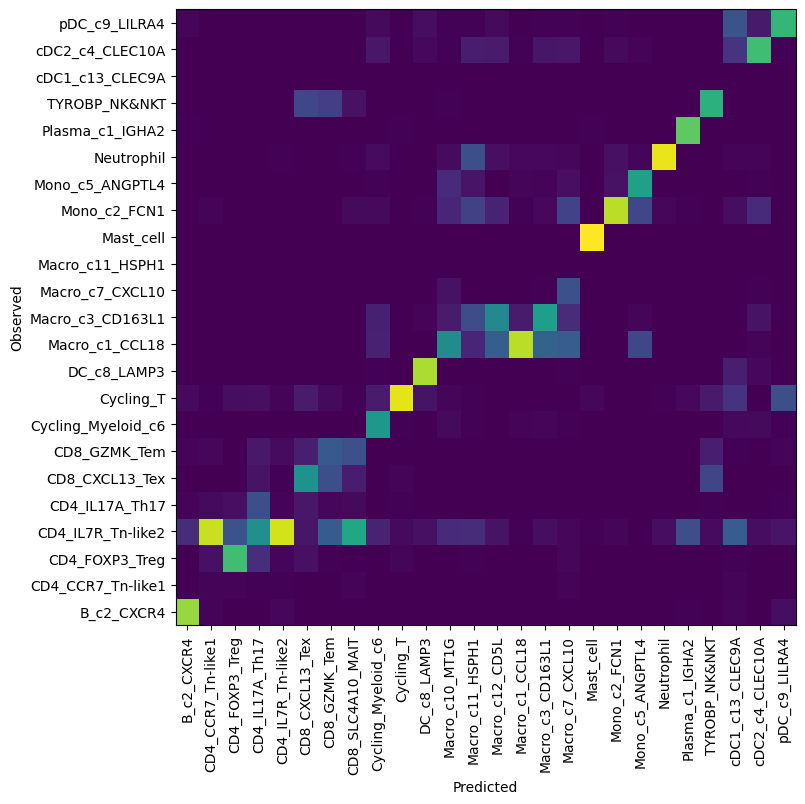

In [113]:
df = (
    adata_regev.obs.groupby(["CellType", SCANVI_PREDICTIONS_KEY])
    .size()
    .unstack(fill_value=0)
)
norm_df = df / df.sum(axis=0)

plt.figure(figsize=(8, 8))
_ = plt.pcolor(norm_df)
_ = plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, rotation=90)
_ = plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xlabel("Predicted")
plt.ylabel("Observed")

In [109]:
adata_regev

AnnData object with n_obs × n_vars = 59496 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'patient', 'lesions', 'location', 'neoadjuvant', 'RNA_snn_res.0.2', 'seurat_clusters', 'percent.mt', 'Cluster', 'RNA_snn_res.1', 'RNA_snn_res.3', 'RNA_snn_res.0.3', 'RNA_snn_res.0.1', 'RNA_snn_res.0.25', 'RNA_snn_res.0.6', 'RNA_snn_res.0.4', 'RNA_snn_res.0.7', 'cluster_name', 'RNA_snn_res.0.5', 'is_outlier', 'RNA_snn_res.0.02', 'RNA_snn_res.0.05', 'RNA_snn_res.0.04', 'RNA_snn_res.0.03', 'RNA_snn_res.0.06', 'RNA_snn_res.2', 'sampleID', 'batchID', 'clTopLevel', 'clMidwayPr', 'cl295v11SubShort', 'cl295v11SubFull', 'SPECIMEN_TYPE', 'SOURCE_HOSPITAL', 'TISSUE_PROCESSING_TEAM', 'PROCESSING_TYPE', 'SINGLECELL_TYPE', 'PatientTypeID', 'HistologicTypeSimple', 'MMR_IHC', 'MMRStatus', 'MLH1Status', 'MMRMLH1Tumor', 'TissueSite_detailed', 'TissueSiteSimple', 'HistologicGrade_detailed', 'HistologicGradeSimple', 'TumorStage', 'NodeStatus_detailed', 'NodeStatusSimple', 'MetastasisStatus', 'TumorSize',

In [111]:
adata_regev.obs[['_scvi_batch', '_scvi_labels', 'leiden', 'labels_scanvi', 'predictions_scanvi']]

,_scvi_batch,_scvi_labels,leiden,labels_scanvi,predictions_scanvi
C103_T_1_1_0_c1_v2_id-AAACCTGTCGGATGTT,1,29,9,Unknown,CD4_IL17A_Th17
C103_T_1_1_0_c1_v2_id-AAACGGGCAACCGCCA,1,29,9,Unknown,CD4_IL17A_Th17
C103_T_1_1_0_c1_v2_id-AAAGATGCACGGACAA,1,29,0,Unknown,Macro_c7_CXCL10
C103_T_1_1_0_c1_v2_id-AAAGCAAAGGTAGCCA,1,29,0,Unknown,Macro_c1_CCL18
C103_T_1_1_0_c1_v2_id-AAAGTAGAGGACACCA,1,29,15,Unknown,Cycling_T
...,...,...,...,...,...
C172_T_0_0_0_c1_v3_id-TTTCCTCTCATTGTGG,1,29,0,Unknown,Macro_c1_CCL18
C172_T_0_0_0_c1_v3_id-TTTGACTCATGAGGGT,1,29,4,Unknown,CD4_FOXP3_Treg
C172_T_0_0_0_c1_v3_id-TTTGACTTCTCGCGTT,1,29,3,Unknown,TYROBP_NK&NKT
C172_T_0_0_0_c1_v3_id-TTTGGTTCAGCTTCCT,1,29,3,Unknown,TYROBP_NK&NKT


In [114]:
adata_regev.obs.iloc[:, -5:].to_csv('regev_scANVI.csv', index=True)